<a href="https://colab.research.google.com/github/Madhuvarma8008/AIML-2025/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.datasets import make_blobs
x,y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)

In [6]:
x.shape

(300, 2)

In [7]:
y_true.shape

(300,)

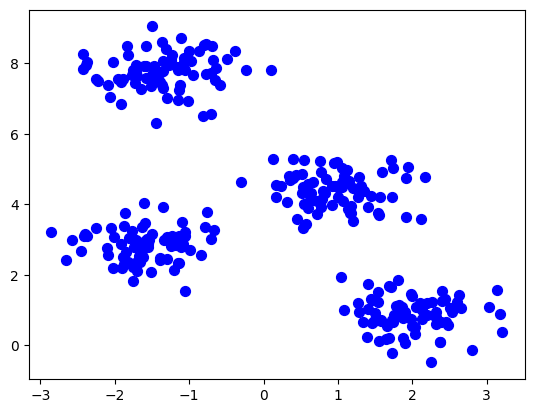

In [8]:
plt.scatter(x[:,0], x[:,1], s=50, color='blue')

In [9]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=4)

In [20]:
kmeans.fit(x)


KMeans(n_clusters=4)

In [21]:
y_kmeans_pred = kmeans.predict(x)

In [22]:
centers = kmeans.cluster_centers_
centers

array([[ 1.99469693,  0.8727049 ],
       [-1.57480456,  2.84532424],
       [-1.35241261,  7.76731726],
       [ 0.95415778,  4.39985544]])

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_kmeans_pred, y_true)

0.0

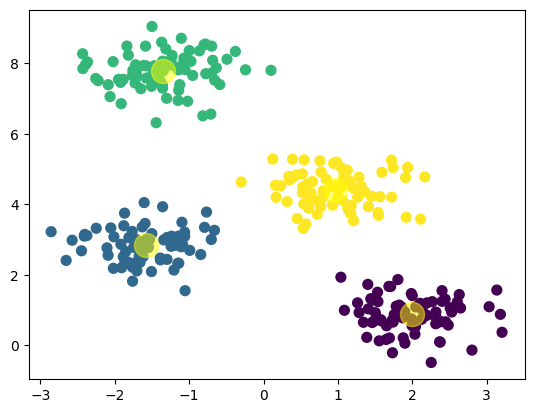

In [24]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans_pred,s=50, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], color='yellow', s=300,alpha=0.5)

In [29]:
from sklearn.metrics import pairwise_distances_argmin

In [30]:
def find_clusters(x, n_clusters, rseed=2):
  rng = np.random.RandomState(rseed)
  i = rng.permutation(x.shape[0])[:n_clusters]
  centers = x[i]
  while True:
    labels = pairwise_distances_argmin(x, centers)
    new_centers = np.array([x[labels == i].mean(0) for i in range(n_clusters)])
    if np.all(centers == new_centers):
      break
    centers = new_centers
  return centers, labels

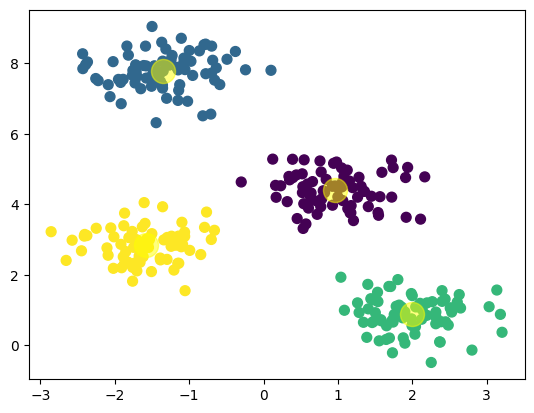

In [31]:
centers, labels = find_clusters(x, 4)
plt.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='yellow',s=300,alpha=0.5)

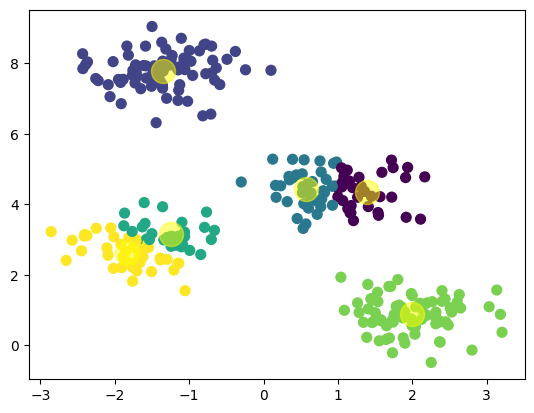

In [34]:
centers, labels = find_clusters(x, 6)
plt.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='yellow',s=300,alpha=0.5)

In [35]:
from sklearn.datasets import make_moons
x,y =make_moons(n_samples=200, noise=.03, random_state=0)


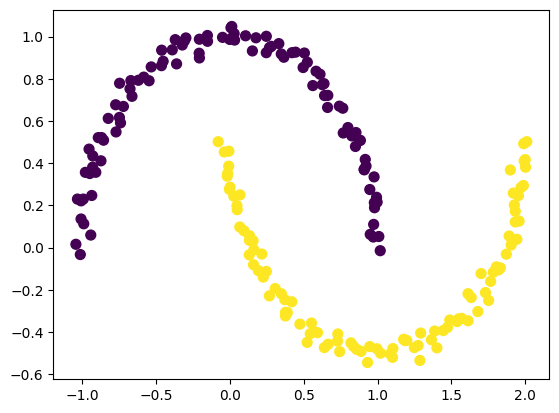

In [36]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='viridis');

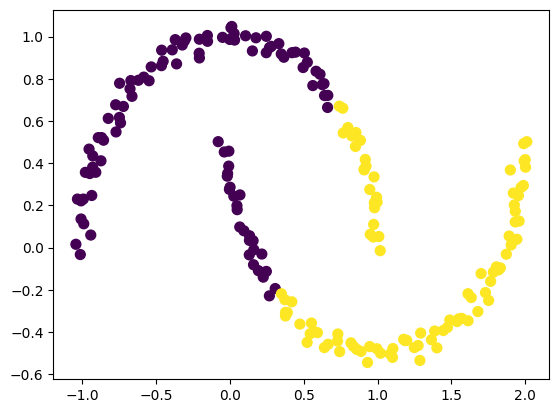

In [37]:
labels = KMeans(2, random_state=0).fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis');

In [38]:
from sklearn.cluster import SpectralClustering

In [40]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

In [41]:
labels = model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


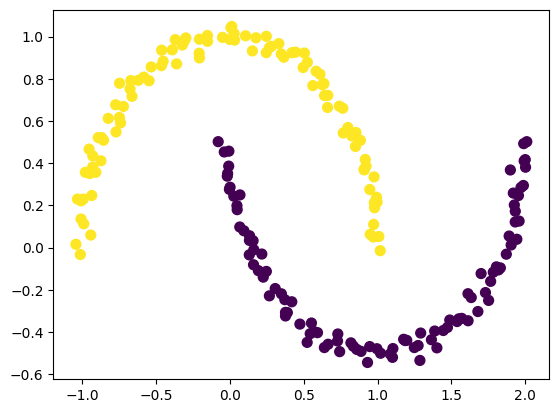

In [42]:
plt.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis');

In [43]:
from sklearn.datasets import make_blobs
x,y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.7, random_state=0)
x=x[:,::-1]

In [44]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [46]:
def plot_kmeans(kmeans, x, n_clusters=4, rseed=0, ax=None):
  labels = kmeans.fit_predict(x)
  ax = ax or plt.gca()
  ax.axis('equal')
  ax.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis',edgecolors='k',zorder=2)
  centers = kmeans.cluster_centers_
  radii = [cdist(x[labels == i], [center]).max() for i, center in enumerate(centers)]
  for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

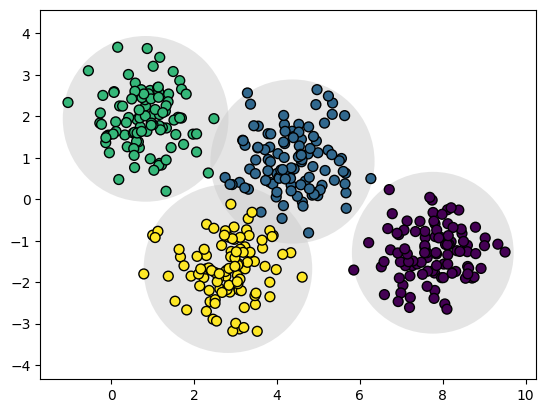

In [48]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
plot_kmeans(kmeans, x)